# Bayesian Structural Time Series: Forecasting and Decomposition Using Facebook's Prophet 

This notebook shows how to forecast and decompose time series using Facebook Prophet. Prophet is internally based on Bayesian Structural Time Series (BSTS), but hides most of the BSTS complexity providing a simple interface.

Similarly to other BSTS examples, we use the electricty demand data sample. 

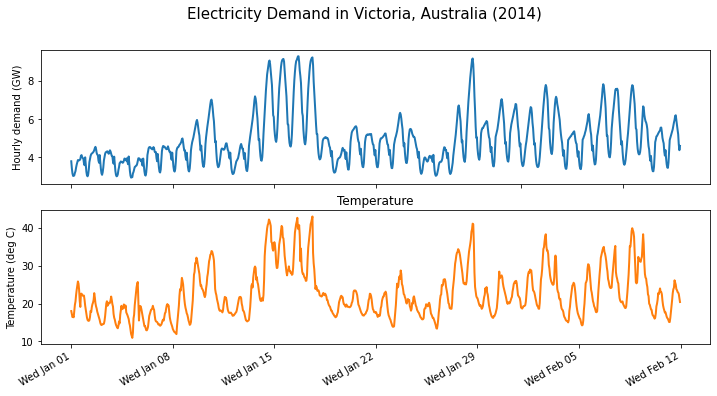

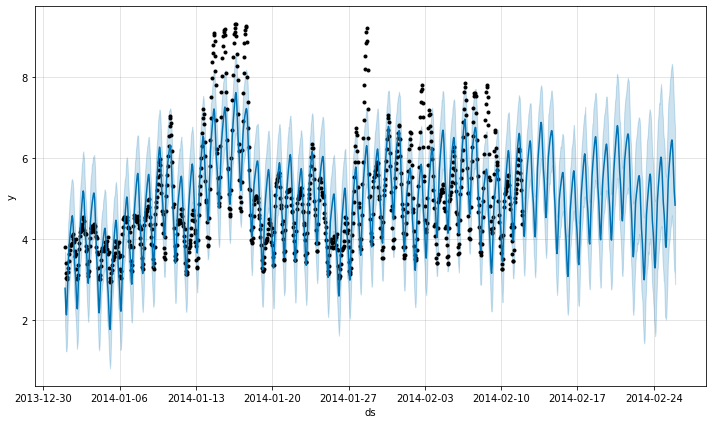

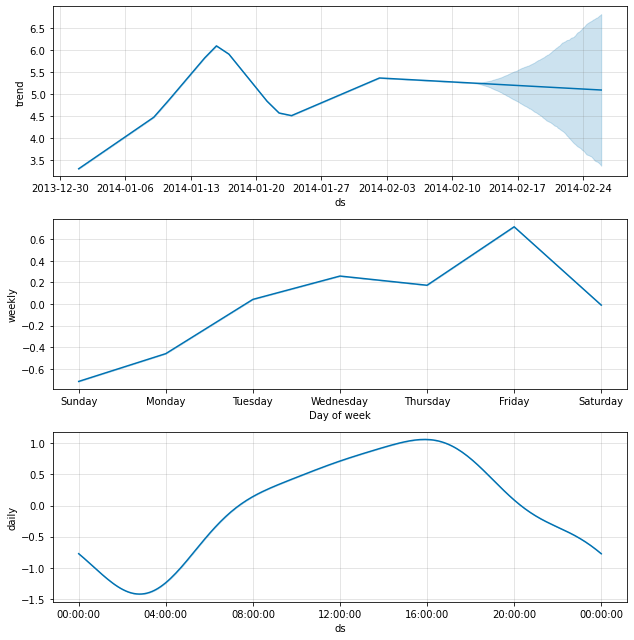

In [6]:
from matplotlib import pylab as plt
import matplotlib.dates as mdates
import seaborn as sns
import pandas as pd
from fbprophet import Prophet

demand_dates = np.arange('2014-01-01', '2014-02-26', dtype='datetime64[h]')
demand_loc = mdates.WeekdayLocator(byweekday=mdates.WE)
demand_fmt = mdates.DateFormatter('%a %b %d')

data = pd.read_csv('../resources/time-series/electricity-demand-victoria.csv', comment='#', header=None).T
data = pd.concat([data, pd.DataFrame(demand_dates)], axis=1)
data.columns = ["demand", "temperature", "date"]

num_forecast_steps = 24 * 7 * 2 # two weeks
data_training = data[:-num_forecast_steps]
data_test = data[-num_forecast_steps:]

colors = sns.color_palette()
c1, c2 = colors[0], colors[1]

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(2, 1, 1)
ax.plot(data_training.date,
        data_training.demand, lw=2, label="training data")
ax.set_ylabel("Hourly demand (GW)")

ax = fig.add_subplot(2, 1, 2)

ax.plot(data_training.date,
        data_training.temperature, lw=2, label="training data", c=c2)
ax.set_ylabel("Temperature (deg C)")
ax.set_title("Temperature")
ax.xaxis.set_major_locator(demand_loc)
ax.xaxis.set_major_formatter(demand_fmt)
fig.suptitle("Electricity Demand in Victoria, Australia (2014)", fontsize=15)
fig.autofmt_xdate()


#
# Forecasting and decomposition using Prophet
#

df = data_training.rename(columns={'date':'ds', 'demand':'y'})

m = Prophet(yearly_seasonality=False)
m.fit(df)

future = m.make_future_dataframe(periods=num_forecast_steps, freq='H')
forecast = m.predict(future)
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)